## Data skewness

Data skewness is the measure of how much the distribution of the data deviates from the normal distribution or how asymmetric a distribution is. Let's visualize this.

## Normal distribution - No skewness
The normal distribution has a bell shape, or zero skewness.

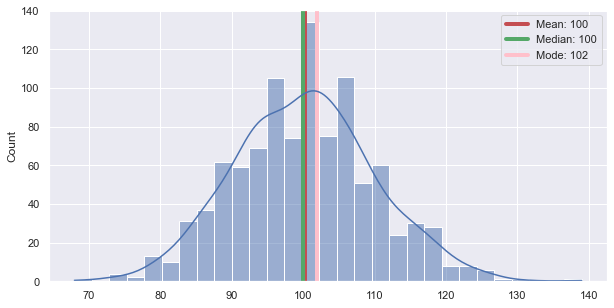

In [106]:
from scipy.stats import skewnorm, skew, mode
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
np.random.seed(42)

dataset = np.random.normal(loc=100, scale=10, size=1000).round(0)
mode = sp.mode(dataset).mode[0]
mean = np.mean(dataset)
median = np.median(dataset)
fig, ax = plt.subplots(figsize=(10,5))
ax.axvline(mean, color='r', linewidth=4, label=f"Mean: {int(mean)}")
ax.axvline(median, color='g', linewidth=4, label=f"Median: {int(median)}")
ax.axvline(mode, color='pink', linewidth=4, label=f"Mode: {int(mode)}")
ax.legend()
sns.histplot(dataset, ax=ax, kde=True);

In the normal distribution (or no skewness) you can see that the mode, mean and median are located close to each other and around the center.

`We say that the data has is not skewed if the skewness = 0`

## Positive skewness or right-skewed

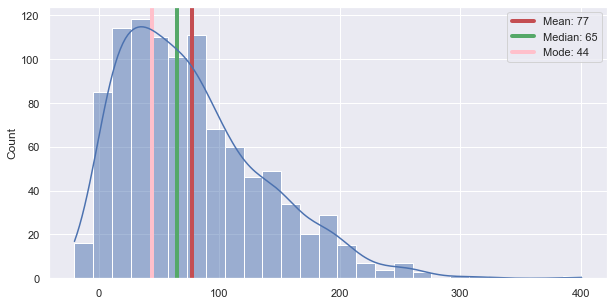

In [111]:
np.random.seed(42)
dataset = (skewnorm.rvs(a=10, size=1000) * 100).round(0)
mode = sp.mode(dataset).mode[0]
mean = np.mean(dataset)
median = np.median(dataset)
fig, ax = plt.subplots(figsize=(10,5))
ax.axvline(mean, color='r', linewidth=4, label=f"Mean: {int(mean)}")
ax.axvline(median, color='g', linewidth=4, label=f"Median: {int(median)}")
ax.axvline(mode, color='pink', linewidth=4, label=f"Mode: {int(mode)}")
ax.legend()
sns.histplot(dataset, ax=ax, kde=True);

When the data is right skewed you can see that the curve id dragged to the right and the mean is greater than the median which is greater than the mode:

Mode < Median < Mean

You can also see that the outliers are located on the right side.

`We say that the data is right skewed if the skewness > 0`

## Negative skewness or left-skewed

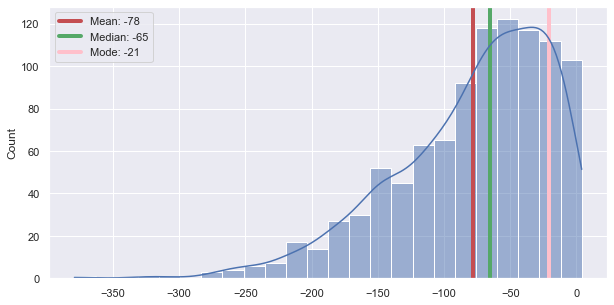

In [112]:
np.random.seed(42)
dataset = (skewnorm.rvs(a=-30, size=1000) * 100).round(0)
mode = sp.mode(dataset).mode[0]
mean = np.mean(dataset)
median = np.median(dataset)
fig, ax = plt.subplots(figsize=(10,5))
ax.axvline(mean, color='r', linewidth=4, label=f"Mean: {int(mean)}")
ax.axvline(median, color='g', linewidth=4, label=f"Median: {int(median)}")
ax.axvline(mode, color='pink', linewidth=4, label=f"Mode: {int(mode)}")
ax.legend()
sns.histplot(dataset, ax=ax, kde=True);

When the data is left skewed you can see that the curve id dragged to the left and the mean is smaller than the median which is smaller than the mode:

Mode > Median > Mean

You can also see that the outliers are located on the left side.


`We say that the data is right skewed if the skewness < 0`

# Calculating the skewness

Here is the formula for calculating the skewness of a dataset:

$$     \tilde{\mu}_3 = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]
  $$

1. Sum the differences of each datapoint from the mean
2. Divide it by the standard deviation
3. Raise it to the power of 3

## 🐍 Python

In [157]:
np.random.seed(42)
dataset_normal = np.random.normal(0, 2, 10000)
mean = np.mean(dataset_normal)
std = np.std(dataset_normal)

# 1. Calculate differences of each datapoint from the mean
diffs_mean = dataset_normal - mean

#2. Sum the differences and divide it by the standard deviation
diffs_mean_divided_by_std = diffs_mean.sum() / std

skewness = diffs_mean_divided_by_std ** 3

print(f"The skewness for the normal distribution is: {skewness:.0f}")

The skewness for the normal distribution is: 0


In [163]:
np.random.seed(42)
dataset_right_skewed = skewnorm.rvs(a=10, size=10000)
mean = np.mean(dataset_right_skewed)
std = np.std(dataset_right_skewed)

# 1. Calculate differences of each datapoint from the mean
diffs_mean = (dataset_right_skewed - mean) ** 3

#2. Sum the differences and divide it by the standard deviation
skewness = diffs_mean.sum() / (std ** 3) 


print(f"The skewness for the right-skewed distribution is: {skewness:.0f}")

The skewness for the right-skewed distribution is: 9660


In [162]:
np.random.seed(42)
dataset_right_skewed = skewnorm.rvs(a=-10, size=10000)
mean = np.mean(dataset_right_skewed)
std = np.std(dataset_right_skewed)

# 1. Calculate differences of each datapoint from the mean
diffs_mean = (dataset_right_skewed - mean) ** 3

#2. Sum the differences and divide it by the standard deviation
skewness = diffs_mean.sum() / (std ** 3) 


print(f"The skewness for the left-skewed distribution is: {skewness:.0f}")

The skewness for the left-skewed distribution is: -9704


## 📚 Libraries

In [164]:
np.random.seed(42)
dataset_normal = np.random.normal(0,2,10000)
dataset_right_skewed = (skewnorm.rvs(a=10, size=1000) * 100)
dataset_left_skewed = (skewnorm.rvs(a=-10, size=1000) * 100)

print(f"The skewness for the normal distribution is: {skew(dataset_normal)}")
print(f"The skewness for the right-skewed distribution is: {skew(dataset_right_skewed)}")
print(f"The skewness for the left-skewed distribution is: {skew(dataset_left_skewed)}")

The skewness for the normal distribution is: 0.001963697766356243
The skewness for the right-skewed distribution is: 0.9507895142308781
The skewness for the left-skewed distribution is: -0.9331542021946119


## 📒 Notebook
The link for the notebook can be found [here](https://github.com/nathanqueija/statistics/blob/master/1_descriptive_statistics/2_median.ipynb)